<a href="https://colab.research.google.com/github/amitav710/ML4SCI-HiggsClassification/blob/main/Copy_of_Copy_of_higgs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/ML4SCI/ML4SCIHackathon/blob/main/HiggsBosonClassificationChallenge/higgs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**This is an example Notebook for running training on Higgs vs background signal classification. **

**Background:** High-energy collisions at the Large Hadron Collider (LHC) produce particles that interact with particle detectors. One important task is to classify different types of collisions based on their physics content, allowing physicists to find patterns in the data and to potentially unravel new discoveries. 

**Problem statement:** The discovery of the Higgs boson by CMS and ATLAS Collaborations was announced at CERN in 2012. In this work, we focus on the potential of Machine Learning and Deep Learning in detecting potential Higgs signal from one of the background processes that mimics it. 

**Dataset:** The dataset is made available by the Center for Machine Learning and Intelligent Systems at University of California, Irvine. 
The dataset can be found on the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS)

**Description:** The dataset consists of a total of 11 million labeled samples of Higgs vs background events produced by Monte Carlo simulations. Each sample consists of 28 features. The first 21 features are kinematic properties measured at the level of the detectors. The last seven are functions of the first 21.




**Steps to load the training dataset**
1. Download the dataset from the UCI website. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/My\Drive

/content/drive/MyDrive


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

--2021-11-15 21:03:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2816407858 (2.6G) [application/x-httpd-php]
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz        100%[===================>]   2.62G  30.2MB/s    in 89s     

2021-11-15 21:04:41 (30.3 MB/s) - ‘HIGGS.csv.gz’ saved [2816407858/2816407858]



2. Unzip the dataset folder

In [ ]:
 !gzip -d HIGGS.csv.gz

In [3]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [5]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import h5py
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.initializers import TruncatedNormal
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

**Load the file using pandas library**

In [6]:
data=pd.read_csv('./HIGGS.csv')

Assign first column 0 to class labels (labeled 1 for signal, 0 for background)  and all others to feature matrix X.

In this example, for the sake of fast checking, we use 1000 samples. To train on the entire dataset, proceed with uncommenting the lines below. 

In [25]:
X=data.iloc[:1000000,1:]#data.iloc[:,1:]
y=data.iloc[:1000000,0]#data.iloc[:,0]

Split your data into training and validation samples where the fraction of the data used for validation is 33%. 

In [26]:
X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

**Visualize your data - One histogram per feature column**

Detailed information on what each feature column is can be found in *Attribute Information* section on the [UCI Machine learning Repositery](https://archive.ics.uci.edu/ml/datasets/HIGGS). For further information, refer to the [paper](https://www.nature.com/articles/ncomms5308) by Baldi et. al 

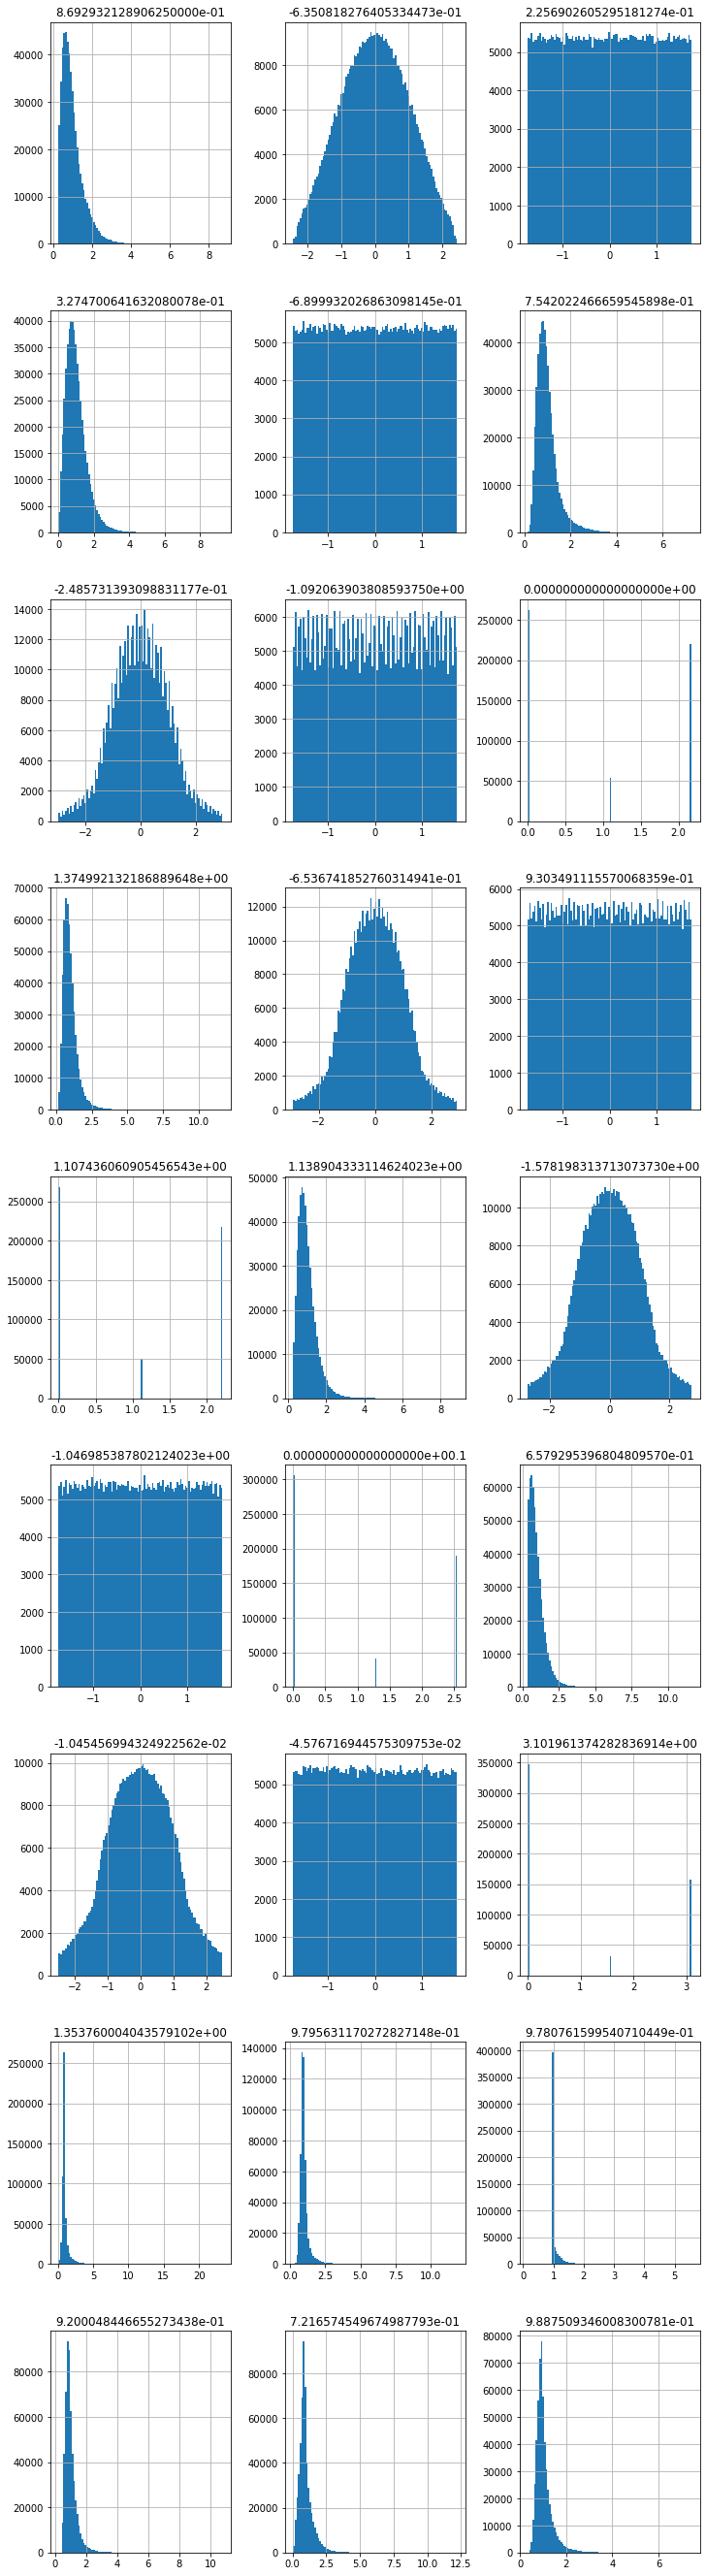

In [27]:
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(X_train.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X_train.hist(column = X_train.columns[i], bins = 100, ax=axis)
        i = i+1

**Setup the Boosted Decision Tree model** (BDT explanation [here](https://docs.microsoft.com/en-us/azure/machine-learning/algorithm-module-reference/boosted-decision-tree-regression#:~:text=Boosting%20means%20that%20each%20tree,small%20risk%20of%20less%20coverage.))

In [ ]:
classifier = 

**Train the Boosted Decision Tree model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit(X_test)

In [ ]:
classifier =  XGBClassifier(learning_rate=0.15, min_split_loss=0.001, max_depth=12)

In [ ]:
classifier.fit(X_train, y_train)

XGBClassifier(learning_rate=0.15, max_depth=12, min_split_loss=0.001)

In [20]:
print(type(X_test))

<class 'numpy.ndarray'>


**Predict on new testing data**

In [ ]:
predictions = classifier.predict(sc.X_test)

TypeError: ignored

**Print confusion matrix which describes the performance of the model classification by displaying the number of True Positives, True Negatives, False Positives and False Negatives. More info on [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)**

In [ ]:
confusion_matrix(y_test, predictions)

array([[45047, 18216],
       [16805, 53932]])

In [ ]:
accuracy_score(y_test, predictions)

0.7386492537313433

**Setup the Neural Network** (some useful info [here](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc))

In [28]:
from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Add
from tensorflow.keras.utils import plot_model

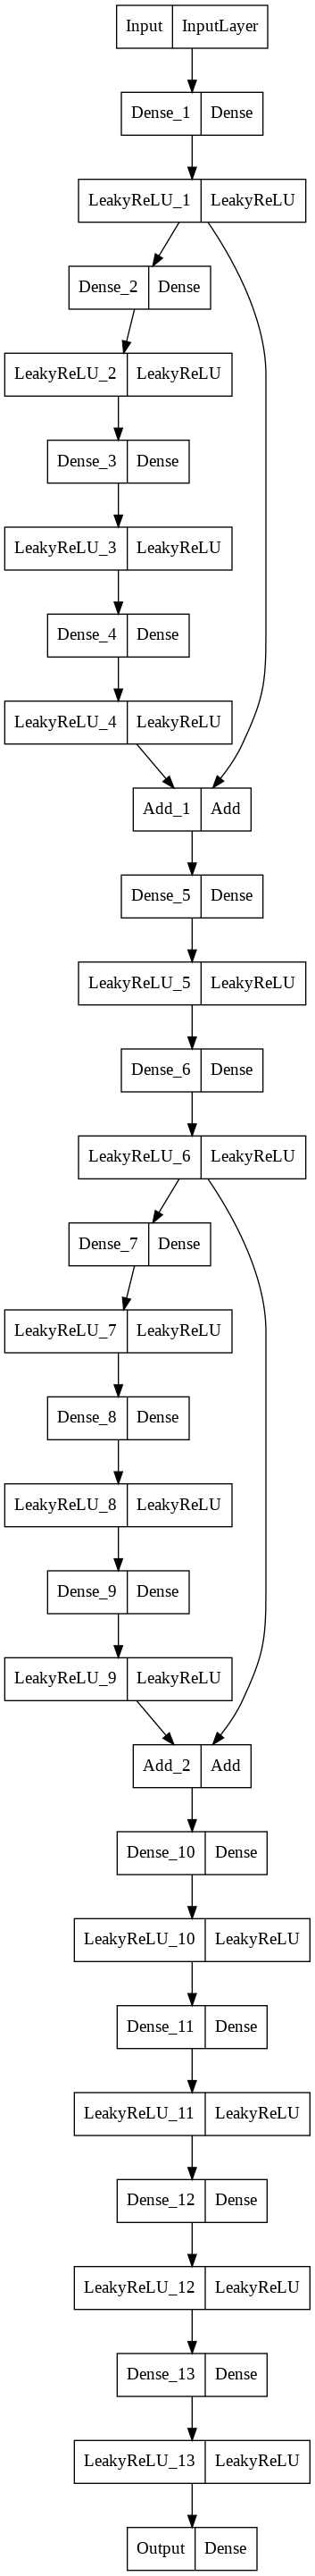

In [36]:
# Input layer
inputs = keras.Input(shape=(28,), name="Input")


# Dense 1
x = Dense(64, name="Dense_1")(inputs)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_1")(x)
x_base_1 = x

x = Dense(128, name="Dense_2")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_2")(x)
x = Dense(128, name="Dense_3")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_3")(x)
x = Dense(64, name="Dense_4")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_4")(x)
x_base_2 = x

# Residual layer
x = Add(name="Add_1")([x_base_2, x_base_1])


x = Dense(128, name="Dense_5")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_5")(x)

x = Dense(64, name="Dense_6")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_6")(x)

x_base_3 = x
x = Dense(128, name="Dense_7")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_7")(x)
x = Dense(128, name="Dense_8")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_8")(x)
x = Dense(64, name="Dense_9")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_9")(x)
x_base_4 = x

x = Add(name="Add_2")([x_base_3, x_base_4])

x = Dense(32, name="Dense_10")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_10")(x)
x = Dense(32, name="Dense_11")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_11")(x)

x = Dense(16, name="Dense_12")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_12")(x)
x = Dense(16, name="Dense_13")(x)
x = LeakyReLU(alpha=0.4, name="LeakyReLU_13")(x)

outputs = Dense(1, activation='sigmoid', name="Output")(x)

model_nn = keras.Model(inputs, outputs, name='v1')
plot_model(model_nn)

In [37]:
model_nn.summary()

Model: "v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 28)]         0           []                               
                                                                                                  
 Dense_1 (Dense)                (None, 64)           1856        ['Input[0][0]']                  
                                                                                                  
 LeakyReLU_1 (LeakyReLU)        (None, 64)           0           ['Dense_1[0][0]']                
                                                                                                  
 Dense_2 (Dense)                (None, 128)          8320        ['LeakyReLU_1[0][0]']            
                                                                                                 

**Train the Neural Network and save your model weights in a h5 file**

In [38]:
opt = tf.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.99, )

In [ ]:
# compile the keras model
model_nn.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
# fit the keras model on the dataset
history=model_nn.fit(X, y,validation_data=(X_val,y_val),epochs=100, batch_size=128)
# evaluate the keras model
_, accuracy = model_nn.evaluate(X, y)
model_nn.save('my_model.h5') ##Saving model weights
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
7813/7813 [==============================] - 55s 7ms/step - loss: 0.5972 - accuracy: 0.6756 - val_loss: 0.5699 - val_accuracy: 0.7014
Epoch 2/100
7813/7813 [==============================] - 54s 7ms/step - loss: 0.5599 - accuracy: 0.7089 - val_loss: 0.5517 - val_accuracy: 0.7155
Epoch 3/100
7813/7813 [==============================] - 58s 7ms/step - loss: 0.5430 - accuracy: 0.7211 - val_loss: 0.5390 - val_accuracy: 0.7235
Epoch 4/100
7813/7813 [==============================] - 56s 7ms/step - loss: 0.5328 - accuracy: 0.7282 - val_loss: 0.5300 - val_accuracy: 0.7290
Epoch 5/100
7813/7813 [==============================] - 53s 7ms/step - loss: 0.5275 - accuracy: 0.7324 - val_loss: 0.5219 - val_accuracy: 0.7345
Epoch 6/100
7813/7813 [==============================] - 53s 7ms/step - loss: 0.5239 - accuracy: 0.7345 - val_loss: 0.5371 - val_accuracy: 0.7285
Epoch 7/100
7813/7813 [==============================] - 53s 7ms/step - loss: 0.5207 - accuracy: 0.7367 - val_loss: 0.5185 -

In [ ]:
_, accuracy = model_nn.evaluate(X, y)

343750/343750 [==============================] - 1090s 3ms/step - loss: 2.6112 - accuracy: 0.6089


In [ ]:
print(accuracy)

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Plot accuracy wrt number of epochs**

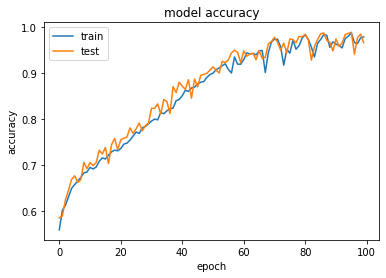

In [ ]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Plot training loss wrt number of epochs**

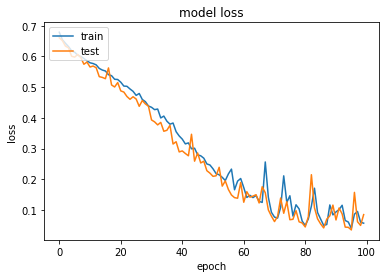

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model_nn.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred.round())

array([[712,  36],
       [ 24, 828]])

**Plot the ROC (Receiver Operating Characteristic) Curve** (more info on ROC could be found [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

In [ ]:
pip install plot-metric

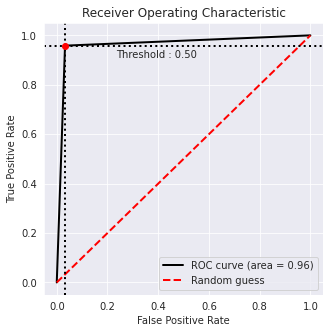

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_pred.round(), y_test, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

**Deliverables**

Please submit the following: 

*   Your full notebook used for training including the ROC Curves, model weights and loss and accuracy plots wrt number of epochs. 




**References**

Baldi, P., Sadowski, P. and Whiteson, D. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014).



**Contributors**

Ali Hariri *(American University of Beirut)*

Sergei V. Gleyzer *(University of Alabama)*